In [112]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#import dataset
bank_df = pd.read_csv('/Users/joeywang/Desktop/MIT data anaylytics/Big data analysis /Project/bank/bankfull2.csv')
bank_df.head(20)

import warnings
warnings.filterwarnings('ignore')

In [113]:
#check dataset infomation
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [114]:
#check the dataset 
bank_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [115]:
#statstical model 
bank_df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [116]:
#check missing value 
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [117]:
#remane the column 
bank_df.rename(columns={'y':'deposit',},inplace=True)
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


NameError: name 'fig' is not defined

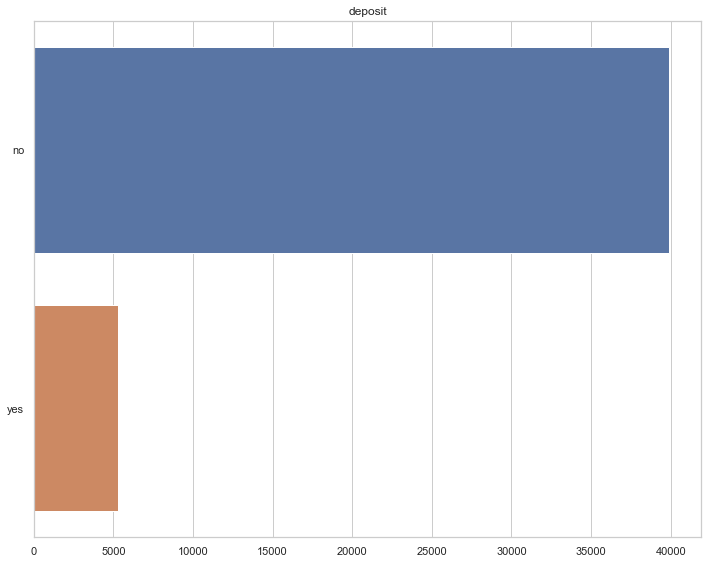

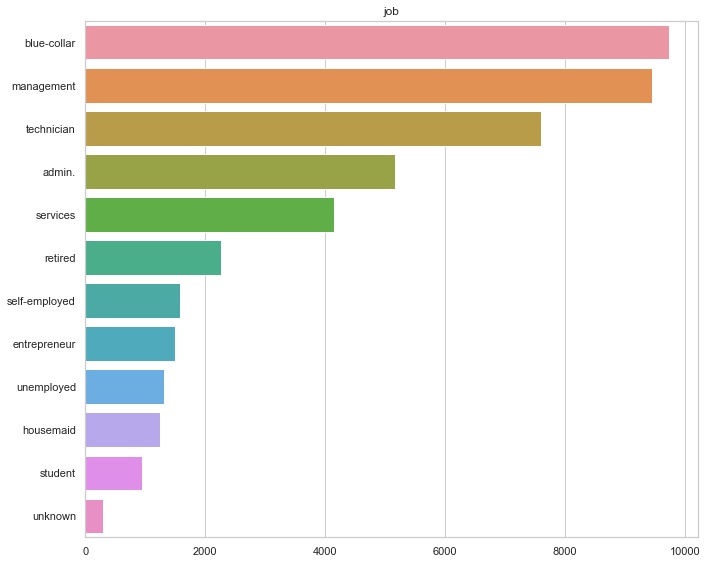

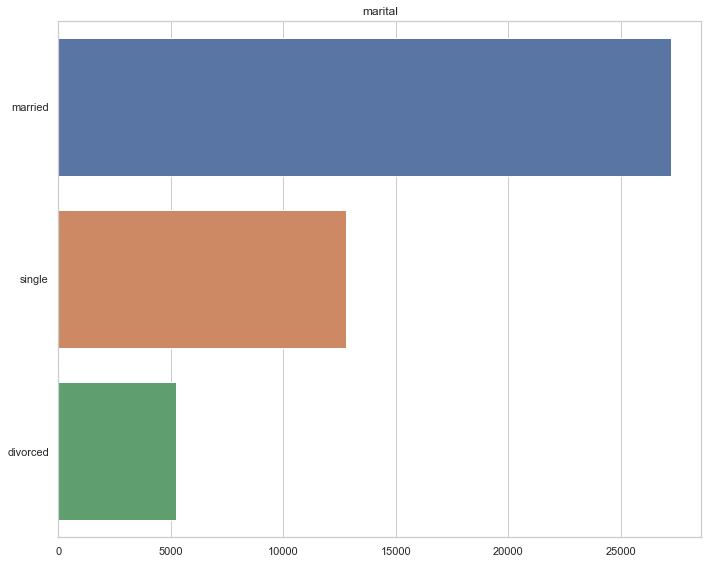

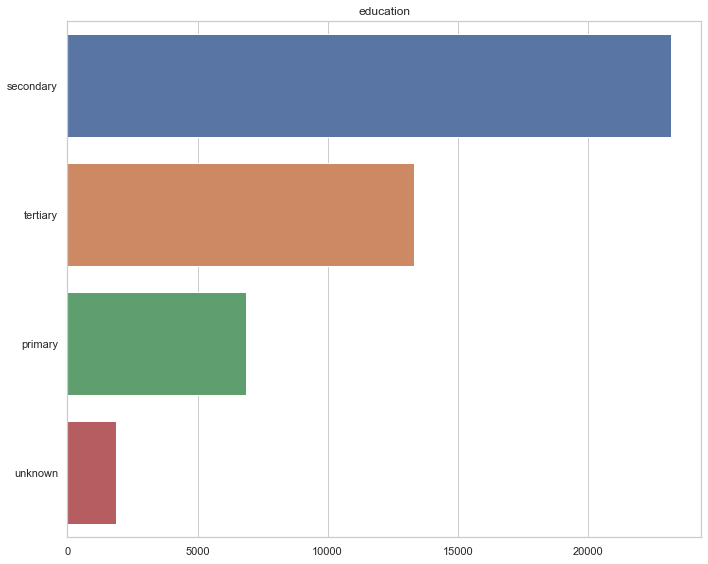

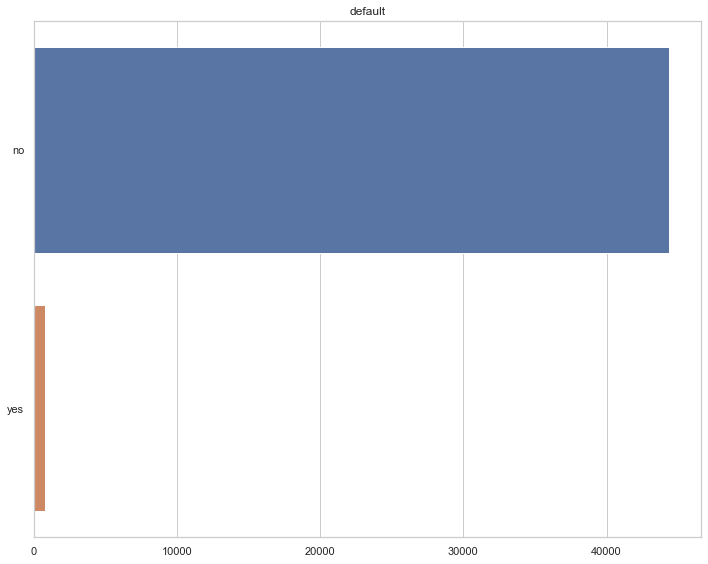

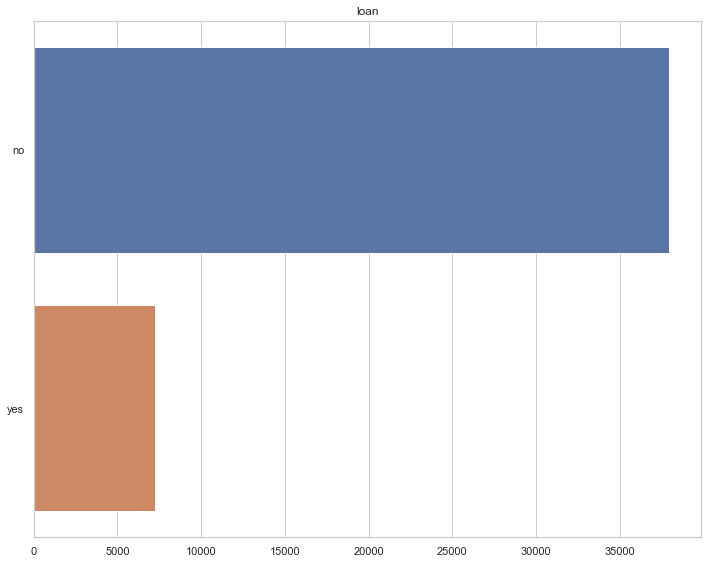

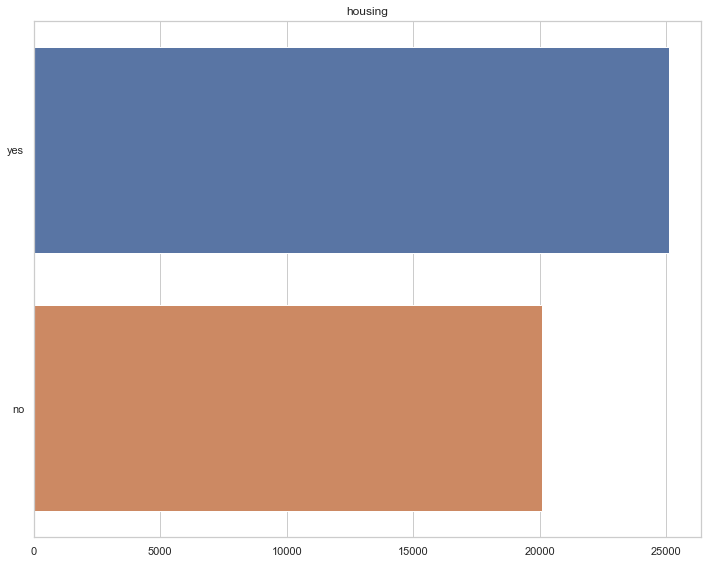

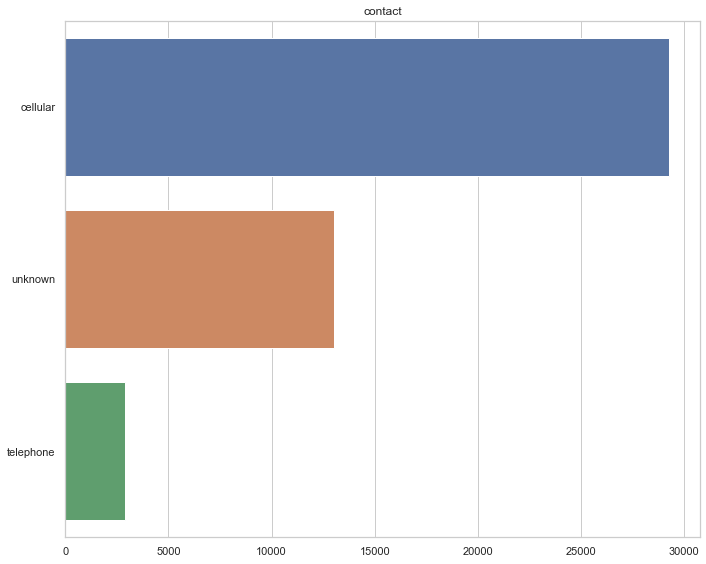

In [118]:
#bar chart 
categorcial_variables = ['deposit','job', 'marital', 'education', 'default', 'loan','housing','contact']
for col in categorcial_variables:
    plt.figure(figsize=(10,8))
    sns.barplot(bank_df[col].value_counts().values, bank_df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    
fig.suptitle('General Analysis')

<Figure size 50000x40000 with 0 Axes>

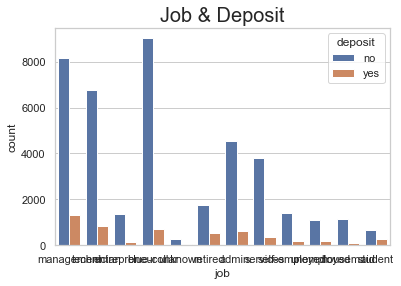

<Figure size 50000x40000 with 0 Axes>

In [119]:
sns.set(style='whitegrid')
sns.countplot(x="job",hue="deposit",data=bank_df)
plt.title('Job & Deposit', fontsize = 20)
plt.figure(dpi=500,figsize=(100,80))

<Figure size 1440x1080 with 0 Axes>

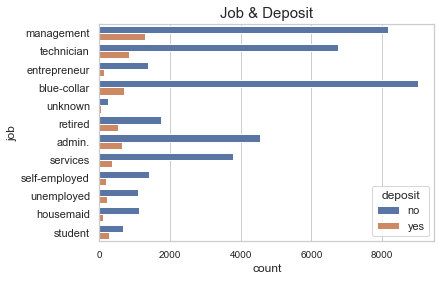

<Figure size 1440x1080 with 0 Axes>

In [120]:
#Job&Deposit 
sns.set(style='whitegrid')
sns.countplot(y="job",hue="deposit",data=bank_df)
plt.title('Job & Deposit', fontsize = 15)
plt.xticks(fontsize=10)
plt.figure(figsize=(20,15))

Text(0.5, 1.0, 'Education & Deposit')

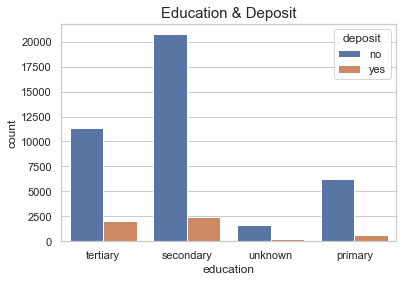

In [121]:
#Education&Deposit 
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="education",hue="deposit",data=bank_df)
plt.title('Education & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Campaign & Deposit')

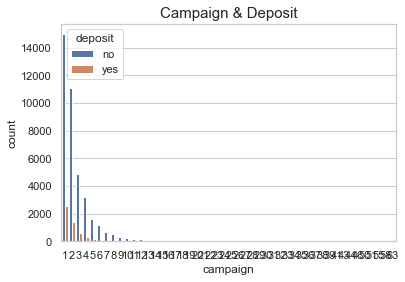

In [122]:
#trend for Campaign&Deposit
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="campaign",hue="deposit",data=bank_df)
plt.title('Campaign & Deposit', fontsize = 15)

Text(0.5, 1.0, 'duration & deposit')

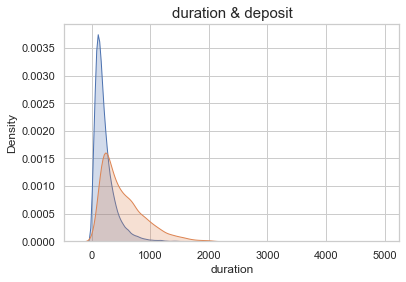

In [123]:
#trend for Duration&Deposit 
no_depo= bank_df[bank_df["deposit"]=="no"]
depo= bank_df[bank_df["deposit"]=="yes"]

sns.kdeplot(no_depo['duration'],label='No',shade=True)
sns.kdeplot(depo['duration'],label = 'yes',shade=True);
plt.title('duration & deposit', fontsize = 15)

Text(0.5, 1.0, 'contact & Deposit')

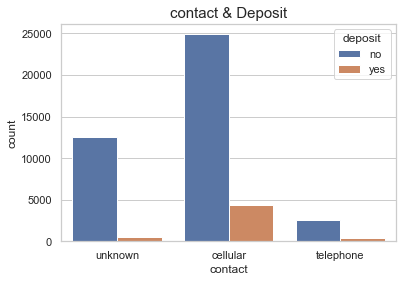

In [125]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="contact",hue="deposit",data=bank_df)
plt.title('contact & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Housing & Deposit')

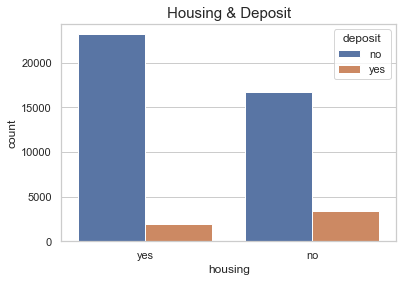

In [126]:
#houring loan & Deposit 
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="housing",hue="deposit",data=bank_df)
plt.title('Housing & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Loan & Deposit')

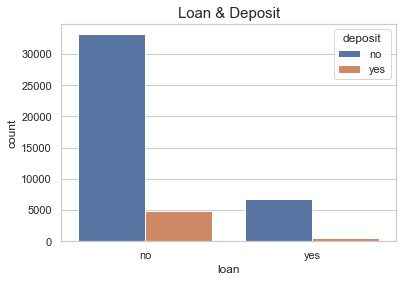

In [127]:
#Loan&Deposit
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="loan",hue="deposit",data=bank_df)
plt.title('Loan & Deposit', fontsize = 15)

Text(0.5, 1.0, 'Marital&deposit')

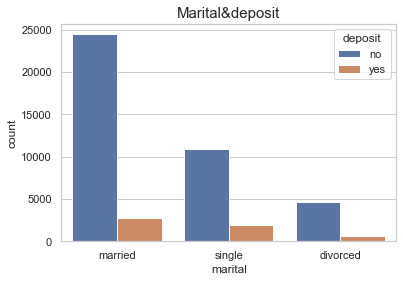

In [128]:
#Marital&Deposit 
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="marital",hue="deposit",data=bank_df)
plt.title('Marital&deposit', fontsize = 15)

Text(0.5, 1.0, 'poutcome & Deposit')

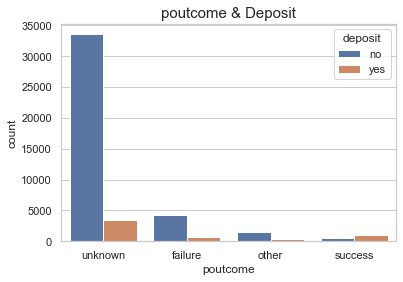

In [129]:
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="poutcome",hue="deposit",data=bank_df)
plt.title('poutcome & Deposit', fontsize = 15)

In [130]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

bank_df['loan']=le.fit_transform(bank_df['loan'])
bank_df['deposit']=le.fit_transform(bank_df['deposit'])
bank_df['default']=le.fit_transform(bank_df['default'])
bank_df['job']=le.fit_transform(bank_df['job'])
bank_df['marital']=le.fit_transform(bank_df['marital'])
bank_df['education']=le.fit_transform(bank_df['education'])
bank_df['poutcome']=le.fit_transform(bank_df['poutcome'])
bank_df['month']=le.fit_transform(bank_df['month'])
bank_df['housing']=le.fit_transform(bank_df['housing'])
bank_df['contact']=le.fit_transform(bank_df['contact'])


bank_df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [131]:
#group the age 
bins = [
        17,30,40,60,80,100
        ]
customerLables = [
        '17-29','30-39','40-49','50-59','60-79']
bank_df['g_age'] = pd.cut(
        bank_df.age,bins,
        right=False,labels=customerLables
        )
bank_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,g_age
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,40-49
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,40-49
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,30-39
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,40-49
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,30-39
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0,30-39
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0,17-29
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0,40-49
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0,40-49
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0,40-49


Text(0.5, 1.0, 'Age & Deposit')

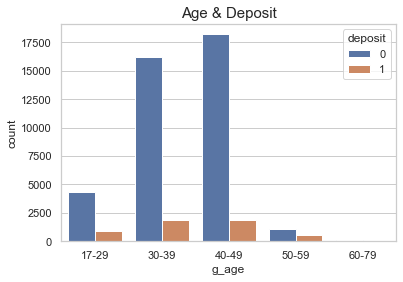

In [132]:
#Age&Deposit
import seaborn as sns 
sns.set(style='whitegrid')
sns.countplot(x="g_age",hue="deposit",data=bank_df)
plt.title('Age & Deposit', fontsize = 15)

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import libraries to creat OLS model 
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np



In [9]:
# creat OLS model 
X = bank_df[['balance','duration','age','job','marital','education', 'loan','day','month','campaign','pdays','previous','poutcome','housing','contact']]
Y = bank_df['deposit']
X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()


NameError: name 'bank_df' is not defined

In [11]:
# creat OLS model 
X = bank_df[['balance','duration','age','marital','education', 'loan','month','campaign','pdays','previous','poutcome','housing','contact']]
Y = bank_df['deposit']
X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()


NameError: name 'bank_df' is not defined

In [12]:
X = bank_df[['balance','duration','age','marital','education', 'loan','month','campaign','pdays','previous','poutcome','housing','contact']]
Y = bank_df['deposit']
X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()


NameError: name 'bank_df' is not defined

In [10]:
fig = plt.figure(figsize=(25,15))
fig = sm.graphics.plot_partregress_grid(reg_res, fig=fig)

NameError: name 'reg_res' is not defined

<Figure size 1800x1080 with 0 Axes>

In [ ]:
bank_df.corr()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(bank_df.corr(), annot=True, cmap="YlGnBu")